In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd
import sys
sys.path.append("/scratch/cgarcia_2002/Complete_analysis")  # Añade la ruta al directorio que contiene tus funciones

import importlib
import functions_spills

importlib.reload(functions_spills)

from matplotlib import rcParams
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'
rcParams['figure.figsize'] = [10, 8]
rcParams['font.size'] = 22

In [2]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2384_calib_time/WCTE_offline_R2384S0P0.root" #bkg

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree = file["WCTEReadoutWindows"]  

times_branch_sorted, times_branch_sorted_TOF, charge_branch_sorted, mpmt_id_branch_sorted, event_number_branch = functions_spills.initial_treatment(tree)


In [3]:
root_file_path = "/data/cgarcia_2002/WCTE/data/2385_calib_time/WCTE_offline_R2385S0P0.root"  #signal

# Open the ROOT file and get the TTree
file = uproot.open(root_file_path)
tree_sig = file["WCTEReadoutWindows"]  

times_branch_sorted_sig, times_branch_sorted_TOF_sig, charge_branch_sorted_sig, mpmt_id_branch_sorted_sig, event_number_branch_sig = functions_spills.initial_treatment(tree_sig)

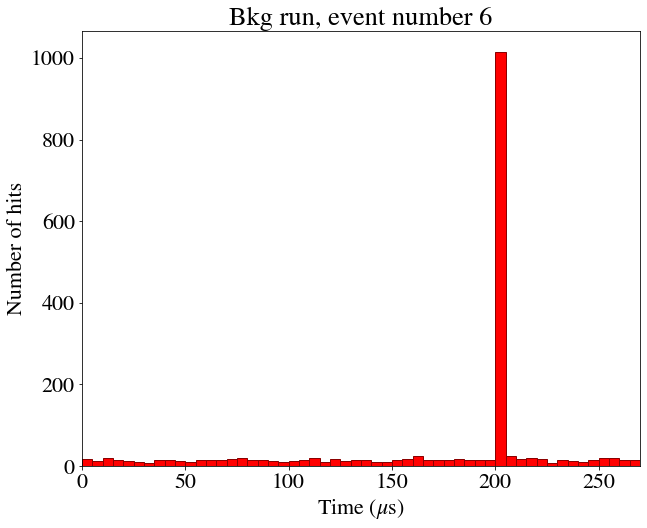

In [4]:
event_number = 6

plt.figure()
plt.hist(times_branch_sorted_TOF[event_number], range = [0, 270000], bins = 54,color='red', edgecolor='darkred')
plt.xlabel(r'Time ($\mu$s)')
plt.ylabel('Number of hits')
plt.title(f'Bkg run, event number {event_number}')
plt.xlim(0, 270000)  # Ajusta el límite del eje X
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
plt.show()

In [5]:
times_branch_modified, threshold_times, deleted_index_dict = functions_spills.repeat_spills_nHits(event_number_branch, times_branch_sorted_TOF, 300, 5000, 6000)
times_branch_modified_sig, threshold_times_sig, deleted_index_dict_sig = functions_spills.repeat_spills_nHits(event_number_branch_sig, times_branch_sorted_TOF_sig, 300, 5000, 6000)


Filtering nHits event 0...
Filtering nHits event 1000...
Filtering nHits event 0...
Filtering nHits event 1000...


In [6]:
print(threshold_times_sig)

{1: [60083.13635313986], 2: [47147.74715900654], 5: [69982.56099231435], 8: [127276.31291780224], 12: [94197.81401140435], 14: [87775.34924193387], 15: [210893.12859314802], 19: [53164.75513751303], 24: [195030.92332824977], 30: [106532.28337834483], 38: [137967.58667549037], 39: [21058.97386494348], 42: [224715.43928988776], 46: [24537.42923689297], 58: [25497.279472176335, 68849.32463525236], 62: [125824.61653652902], 64: [55627.49135576018], 66: [109191.74714765625], 69: [134393.78308405506], 80: [241506.3567861081], 84: [192494.68806973213], 85: [154563.14545949115], 89: [177929.75871973214], 90: [22792.541888949487, 56748.66773834484], 100: [246374.43623916278], 103: [18660.58845618956], 106: [17261.752827935266], 109: [113209.87558100658], 110: [46191.39647810027], 120: [255319.4578025674], 127: [74918.3734522712], 128: [48535.8896939519], 131: [111442.98207764703], 142: [51113.264149787785], 143: [11513.745193780194, 54473.74960198376], 149: [225889.26289472656], 152: [146320.27

In [7]:
charge_branch_filtered = functions_spills.delete_indices_list(charge_branch_sorted, deleted_index_dict)
charge_branch_filtered_sig = functions_spills.delete_indices_list(charge_branch_sorted_sig, deleted_index_dict_sig)

In [8]:
times_branch_modified_chargesTT, charge_branch_modified_chargesTT, threshold_charges, deleted_indices = functions_spills.repeat_spills_Charge(event_number_branch, times_branch_modified, charge_branch_filtered, 50, 5000, threshold = 5000)
times_branch_modified_chargesTT_sig, charge_branch_modified_chargesTT_sig, threshold_charges_sig, deleted_indices_sig = functions_spills.repeat_spills_Charge(event_number_branch_sig, times_branch_modified_sig, charge_branch_filtered_sig, 50, 5000, threshold = 5000)

Filtering charge on event 0...
Filtering charge on event 1000...
Filtering charge on event 0...
Filtering charge on event 1000...


In [9]:
print(threshold_charges)

{7: [160646.69965204532], 13: [209090.52410623746], 21: [195197.33072523933], 72: [4197.088150849084], 87: [171999.80960563247, 193179.86314996652], 89: [125266.6683564509], 102: [46345.6649449645], 110: [212907.48033199584], 120: [83078.92420966277], 148: [226380.47834647182], 184: [207317.67511380592], 200: [22905.77600543527], 203: [156176.2518939893], 209: [100898.65174190603], 215: [14781.1083215375], 228: [175390.7463832087], 230: [81766.19008496653], 244: [86640.20762587896], 276: [239796.101506641], 278: [210856.08330332587], 279: [268516.14689590404], 294: [116467.1317894014], 320: [130271.47970171773], 321: [41797.13606341759], 326: [128529.37765802181], 341: [162740.01148889246], 342: [108738.13179459248], 360: [33253.97797611576], 382: [139411.37536186117], 389: [94820.26573759536], 394: [94285.16818936425], 395: [3933.760159808248], 399: [55519.143129260585], 422: [113795.85017071856], 427: [195282.4561703125], 439: [12790.276098833705], 451: [231377.81664870723], 454: [19

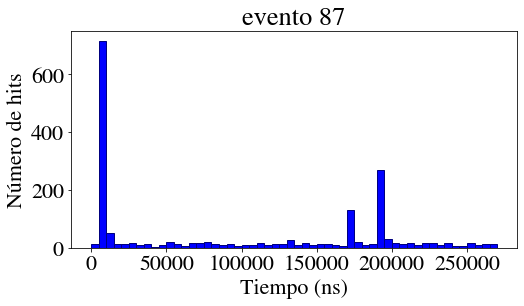

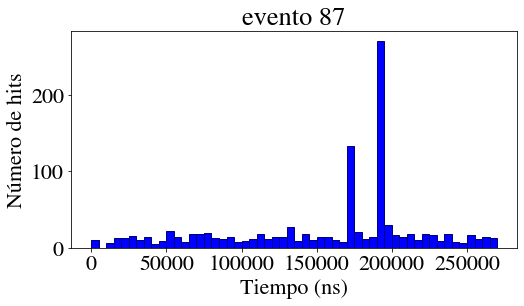

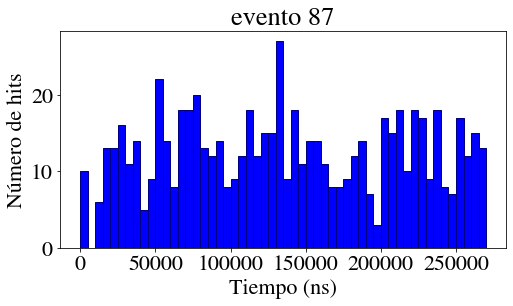

In [10]:
event_number = 87

plt.figure(figsize=(8, 4))
plt.hist(times_branch_sorted_TOF[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()


plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

plt.figure(figsize=(8, 4))
plt.hist(times_branch_modified_chargesTT[event_number], range = [0, 270000], bins = 54,color='blue', edgecolor='navy')
plt.xlabel('Tiempo (ns)')
plt.ylabel('Número de hits')
plt.title(f'evento {event_number}')
plt.show()

In [11]:
nDetections_event_in = []
nDetections_event_fin = []

nDetections_event_in_sig = []
nDetections_event_fin_sig = []

for x in times_branch_sorted_TOF:
    nDetections_event_in.append(len(x))

for x in times_branch_modified_chargesTT:
    nDetections_event_fin.append(len(x))

for x in times_branch_sorted_TOF_sig:
    nDetections_event_in_sig.append(len(x))

for x in times_branch_modified_chargesTT_sig:
    nDetections_event_fin_sig.append(len(x))

In [32]:
n_bins = 50

N_events = tree.num_entries
N_events_sig = tree_sig.num_entries

hist_in, bin_edges = np.histogram(nDetections_event_in, bins=n_bins)
hist_in_sig, _ = np.histogram(nDetections_event_in_sig, bins=bin_edges)  # usa los mismos bordes

hist_filtered, _ = np.histogram(nDetections_event_fin, bins = bin_edges)
hist_filtered_sig, _ = np.histogram(nDetections_event_fin_sig, bins = bin_edges)

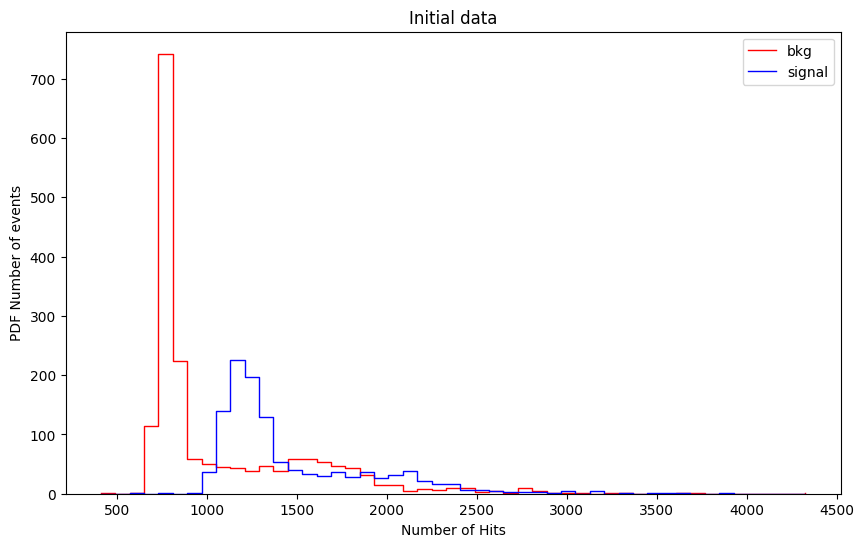

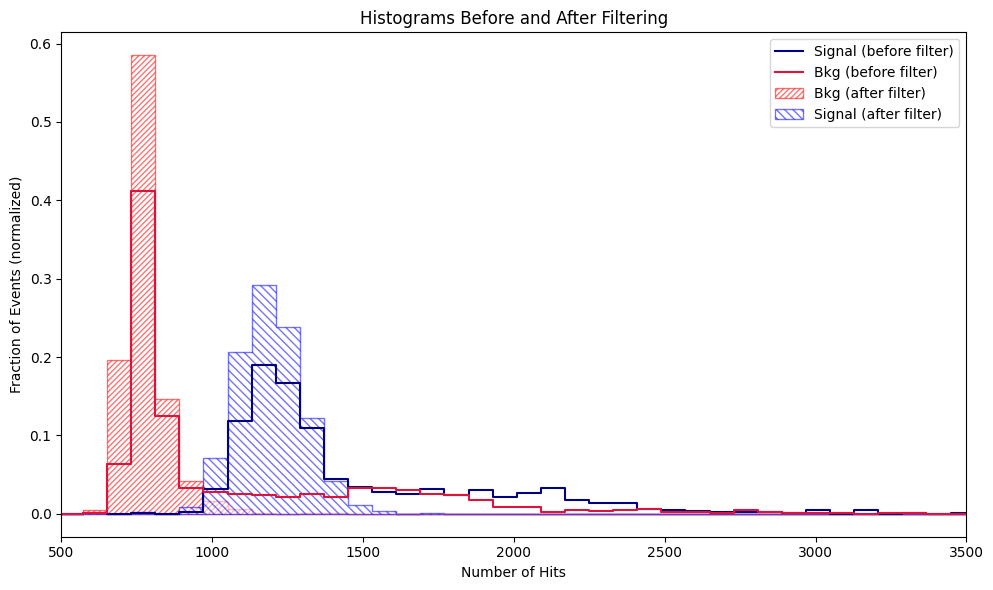

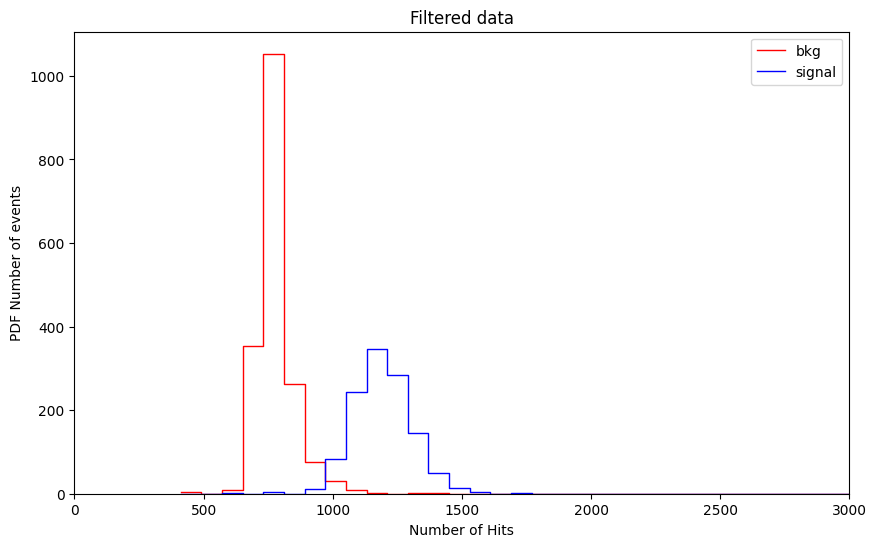

In [37]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_in, where='post', linewidth=1, label='bkg', color='red')
plt.step(bin_edges[:-1], hist_in_sig, where='post', linewidth=1, label='signal', color='blue')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Initial data')
#plt.xlim(0, 3000)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.fill_between(bin_edges[:-1], hist_filtered / N_events, hatch='//////', step='post', color='white', edgecolor='red', alpha=0.55, label='Bkg (after filter)')
plt.fill_between(bin_edges[:-1], hist_filtered_sig / N_events_sig, hatch='\\\\\\\\', step='post', color='white', edgecolor='blue', alpha=0.55, label='Signal (after filter)')
plt.step(bin_edges[:-1], hist_in_sig / N_events_sig, where='post', color='navy', linestyle='-', linewidth=1.5, label='Signal (before filter)')
plt.step(bin_edges[:-1], hist_in / N_events, where='post', color='crimson', linestyle='-', linewidth=1.5, label='Bkg (before filter)')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Fraction of Events (normalized)')
plt.title('Histograms Before and After Filtering')
plt.tight_layout()
plt.xlim(500, 3500)
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_filtered, linewidth = 1, where='post', label='bkg', color='red')
plt.step(bin_edges[:-1], hist_filtered_sig, linewidth = 1, where='post', label='signal', color='blue')
plt.ylim(bottom=0)
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('PDF Number of events')
plt.title('Filtered data')
plt.xlim(0, 3000)
plt.show()

In [14]:
bin_window = 100

nHits_tot = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_chargesTT, bin_window)
nHits_in = functions_spills.counting_nHits_window(event_number_branch, times_branch_sorted_TOF, bin_window)

nHits_tot_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_chargesTT_sig, bin_window)
nHits_in_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sorted_TOF_sig, bin_window)

In [15]:
hist_in, bin_edges = np.histogram(nHits_in, bins=100, range=(0, 500))
hist_in_sig, _ = np.histogram(nHits_in_sig, bins=bin_edges)  # usa los mismos bordes

hist_filtered, _ = np.histogram(nHits_tot, bins = bin_edges)
hist_filtered_sig, _ = np.histogram(nHits_tot_sig, bins = bin_edges)

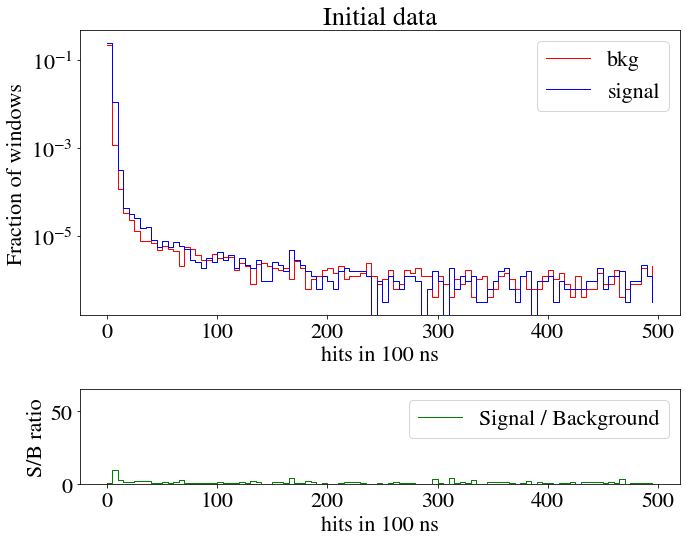

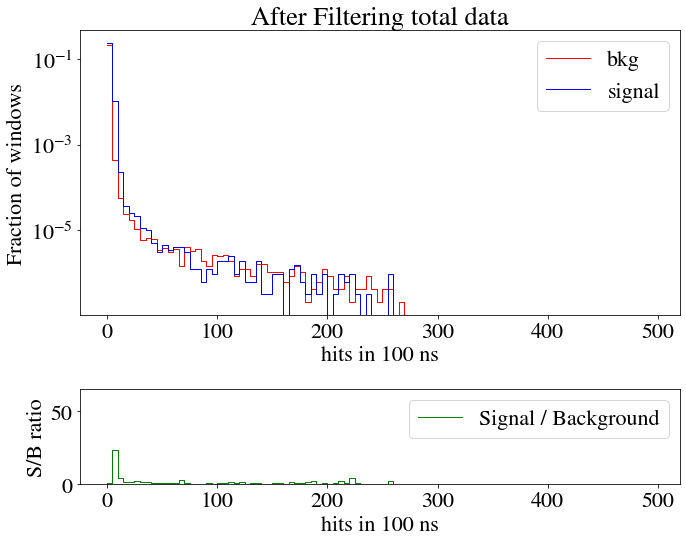

In [16]:
n_windows_ev = 270000 / bin_window

fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bin_edges[:-1], hist_in / (N_events * n_windows_ev), linewidth = 1, where='post', label='bkg', color='red')
axs[0].step(bin_edges[:-1], hist_in_sig / (N_events_sig * n_windows_ev), linewidth = 1, where='post', label='signal', color='blue')

axs[0].set_ylabel("Fraction of windows")
axs[0].set_xlabel(f"hits in {bin_window} ns")
axs[0].set_title("Initial data")
axs[0].set_yscale('log')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio = np.divide(
    hist_in_sig / (N_events_sig * n_windows_ev),
    hist_in / (N_events * n_windows_ev),
    out=np.full_like(hist_in, 0, dtype=float),
    where=hist_in > 0)
axs[1].step(bin_edges[:-1], ratio, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel(f"hits in {bin_window} ns")
axs[1].set_ylabel("S/B ratio")
axs[1].legend()
axs[1].set_ylim(0, 65)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 1, figsize=(10, 8), gridspec_kw={'height_ratios': [3, 1]})

# Top plot: Background and Signal
axs[0].step(bin_edges[:-1], hist_filtered / (N_events * n_windows_ev), linewidth = 1, where='post', label='bkg', color='red')
axs[0].step(bin_edges[:-1], hist_filtered_sig / (N_events_sig * n_windows_ev), linewidth = 1, where='post', label='signal', color='blue')
axs[0].set_ylabel("Fraction of windows")
axs[0].set_xlabel(f"hits in {bin_window} ns")
axs[0].set_title("After Filtering total data")
axs[0].set_yscale('log')
axs[0].legend()

# Bottom plot: Signal/Background Ratio
ratio_2 = np.divide(
    hist_filtered_sig / (N_events_sig * n_windows_ev),
    hist_filtered / (N_events * n_windows_ev),
    out=np.full_like(hist_filtered, 0, dtype=float),
    where=hist_filtered > 0)
axs[1].step(bin_edges[:-1], ratio_2, linewidth = 1, where='post', color='green', label='Signal / Background')
axs[1].set_xlabel(f"hits in {bin_window} ns")
axs[1].set_ylabel("S/B ratio")
axs[1].legend()
axs[1].set_ylim(0, 65)
plt.tight_layout()
plt.show()


In [17]:
threshold_times_50 = functions_spills.prompt_candidates(event_number_branch, times_branch_modified_chargesTT, 100, 200, 10, 50)
threshold_times_50_sig = functions_spills.prompt_candidates(event_number_branch_sig, times_branch_modified_chargesTT_sig, 100, 200, 10, 50)

Searching prompt candidates on event 0...


Searching prompt candidates on event 1000...
Searching prompt candidates on event 0...
Searching prompt candidates on event 1000...


In [18]:
print(threshold_times_50_sig)

total = sum(len(lista) for lista in threshold_times_50.values())
print("Total de elementos en todas las listas:", total)

total = sum(len(lista) for lista in threshold_times_50_sig.values())
print("Total de elementos en todas las listas:", total)


{0: [173419.59429004797], 2: [105350.41497222228], 6: [137162.1998409207], 9: [89868.15052268506], 10: [224146.84127213727], 11: [189218.65378835282, 228115.837841617], 12: [138815.36196319238, 155180.8227398277, 177495.1964535463, 192311.44405622475], 13: [14404.670389199531], 17: [22211.2534171625], 18: [109288.08283023477], 25: [74283.84189384435, 146989.55924966244], 26: [2860.5894205609366, 132044.46053607078, 252526.6037927086], 28: [49733.82082799895], 34: [61372.38467752161], 36: [158963.36508688936], 38: [49943.35939266451, 102154.77605849202], 39: [227767.57433576207], 43: [105305.5280387973], 45: [149556.5321455078], 46: [7695.393718625066, 51292.91973151974, 124161.50787458428, 148485.87315326204], 47: [160477.26305757381], 48: [27113.605210891885, 179211.54387487166], 49: [173576.90382548736, 221967.53153192007], 51: [87790.98924074497], 52: [48283.21615404427], 54: [207098.08838562536], 55: [67272.28749425229, 234150.57084952612], 56: [173132.40605328872], 57: [148077.150

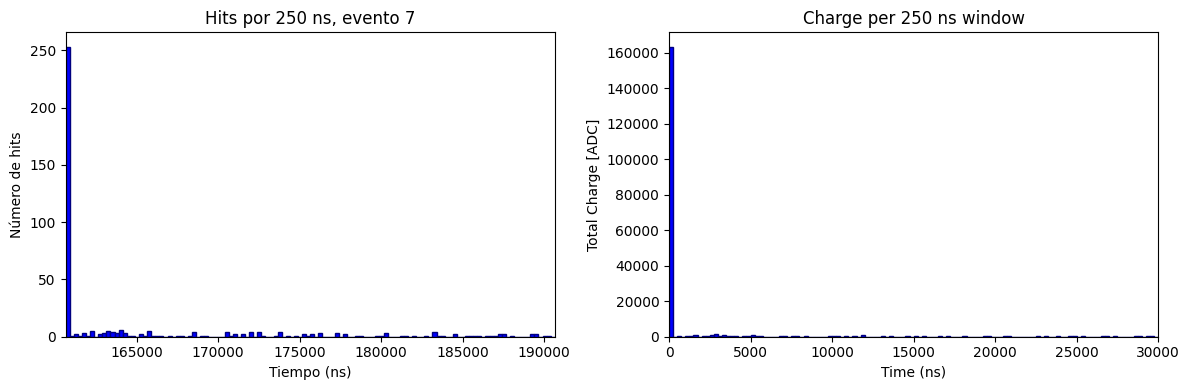

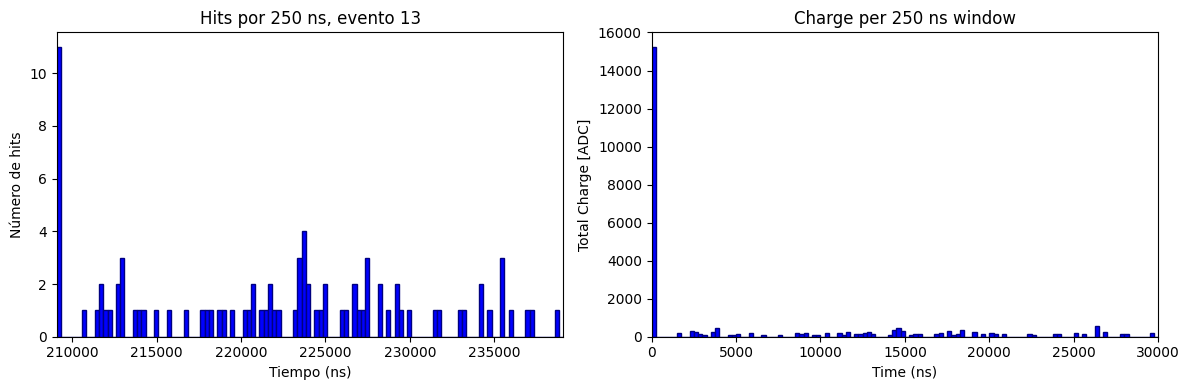

'\n        plt.figure(figsize=(8, 4))\n        plt.hist(charge, bins=100, color=\'blue\', edgecolor=\'navy\')\n        plt.xlabel(\'Charge (u.a)\')\n        plt.ylabel(\'Número de hits\')\n        plt.title("Histograma Charge in 50ns window")\n        plt.show()'

In [19]:
trigger_times_half = dict(list(threshold_charges.items())[0:2])
bin_time = 250
delta = 30000

for event_number in trigger_times_half:
    for start_time in trigger_times_half[event_number]:
        times_branch_event = times_branch_sorted_TOF[event_number]
        charges_branch_event = charge_branch_sorted[event_number]

        mask = (times_branch_event >= start_time) & (times_branch_event < start_time + delta)

        time = times_branch_event[mask]
        charge = charges_branch_event[mask]

        plt.style.use('default')
        fig, axs = plt.subplots(1, 2, figsize=(12, 4))

        # --- Subplot 2: Histograma de número de hits en ventanas de 10 ns ---
        axs[0].hist(time, range=(start_time, start_time + delta), bins=int(delta/bin_time), color='blue', edgecolor='navy')
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f"Hits por {bin_time} ns, evento {event_number}")
        axs[0].set_xlim(start_time, start_time+delta)
        #axs[0].set_yscale('log')

        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, delta)

        axs[1].bar(np.arange(0, 0+delta, bin_time), sum_charges, width = bin_time, color='blue',  align='edge', edgecolor='navy')
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [ADC]")
        axs[1].set_title(f"Charge per {bin_time} ns window")
        axs[1].set_xlim(0, delta)
        #axs[1].set_yscale('log')
        plt.tight_layout()
        plt.show()
"""
        plt.figure(figsize=(8, 4))
        plt.hist(charge, bins=100, color='blue', edgecolor='navy')
        plt.xlabel('Charge (u.a)')
        plt.ylabel('Número de hits')
        plt.title("Histograma Charge in 50ns window")
        plt.show()"""

In [20]:
window_ns = 100

times_branch_sup5 = []
for event in event_number_branch:

    if event in threshold_times_50.keys():
    
        all_hits = [t for ref_time in threshold_times_50[event]
            for t in times_branch_modified_chargesTT[event]
            if ref_time <= t <= ref_time + window_ns]
    else:
        all_hits = []
    
    times_branch_sup5.append(np.array(all_hits))

times_branch_sup5_sig = []
for event in event_number_branch_sig:
    if event in  threshold_times_50_sig.keys():

        all_hits = [t for ref_time in threshold_times_50_sig[event]
            for t in times_branch_modified_chargesTT_sig[event]
            if ref_time <= t <= ref_time + window_ns]
    else:
        all_hits= []
    times_branch_sup5_sig.append(np.array(all_hits))

In [21]:
def lista_complementaria_eventos(lista1, lista2):
    """
    Devuelve una lista de arrays, cada uno es el complementario de lista2 respecto a lista1 para cada evento.
    """
    return [np.array([x for x in arr1 if x not in arr2])
            for arr1, arr2 in zip(lista1, lista2)]

times_branch_inf5 = lista_complementaria_eventos(times_branch_modified_chargesTT, times_branch_sup5)
times_branch_inf5_sig = lista_complementaria_eventos(times_branch_modified_chargesTT_sig, times_branch_sup5_sig)


In [22]:
print(times_branch_modified_chargesTT_sig[0])

[   598.86030289    822.66447044   1601.89079881 ... 269498.96531558
 269646.17341961 269996.50976566]


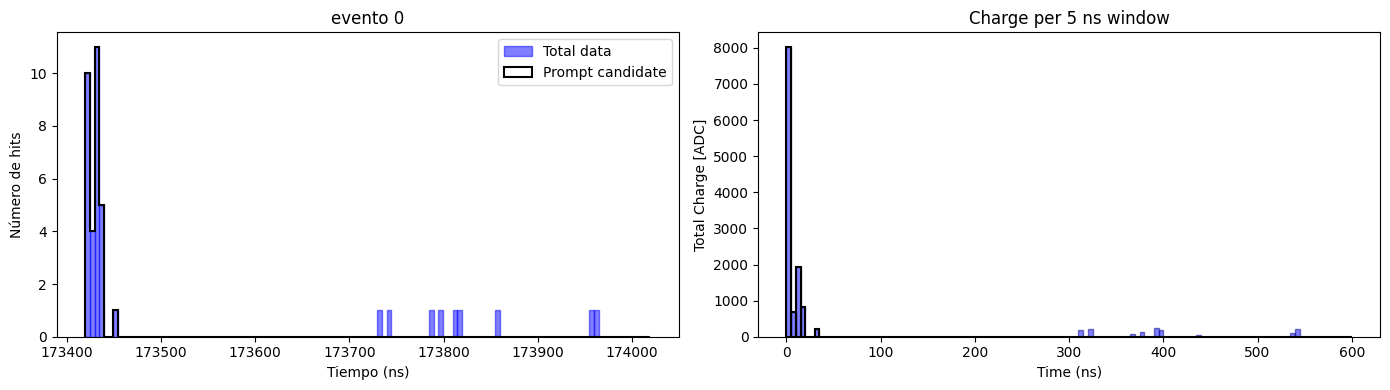

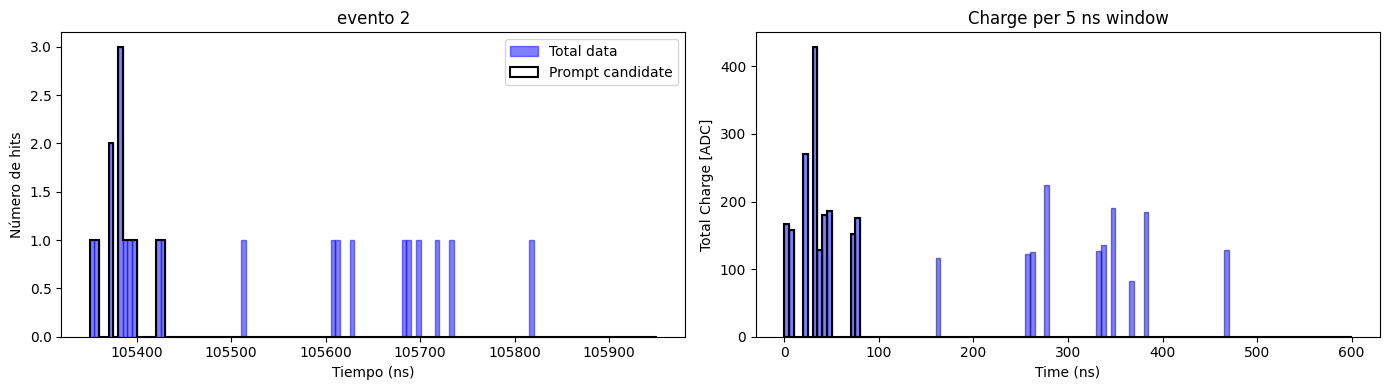

In [23]:
threshold_times_50_cutted = dict(list(threshold_times_50_sig.items())[0:2])

for event_number in threshold_times_50_cutted:
    for start_time in threshold_times_50_cutted[event_number]:

        indices_en_rango = np.where((times_branch_modified_chargesTT_sig[event_number] >= start_time) & (times_branch_modified_chargesTT_sig[event_number] < start_time + 600))[0]
        charge = charge_branch_modified_chargesTT_sig[event_number][indices_en_rango]
        time = times_branch_modified_chargesTT_sig[event_number][indices_en_rango]

        bin_time =  5
        sum_charges = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, 600)

        set_sup5 = set(times_branch_sup5_sig[event_number])

        # Encontramos los índices en la primera lista cuyos elementos están en la segunda
        matching_indices = [i for i, val in enumerate(times_branch_modified_chargesTT_sig[event_number]) if val in set_sup5]

        charges_sup5 = charge_branch_modified_chargesTT_sig[event_number][matching_indices]

        indices_en_rango = np.where((times_branch_sup5_sig[event_number] >= start_time) & (times_branch_sup5_sig[event_number] < start_time + 600))[0]
        charge = charges_sup5[indices_en_rango]
        time = times_branch_sup5_sig[event_number][indices_en_rango]

        sum_charges_sup5 = functions_spills.plot_TotalCharge_Time(time, charge, bin_time, 600)
    

        fig, axs = plt.subplots(1, 2, figsize=(14, 4))

        # Left: Histogram of hits
        axs[0].hist(
            times_branch_modified_chargesTT_sig[event_number],
            range=[start_time, start_time + 600],
            bins=120,
            color='blue',
            edgecolor='blue',
            alpha=0.5,
            label="Total data"
        )
        axs[0].hist(
            times_branch_sup5_sig[event_number],
            range=[start_time, start_time + 600],
            bins=120,
            histtype='step',
            color='black',
            linewidth=1.5,
            label="Prompt candidate"
        )
        axs[0].set_xlabel('Tiempo (ns)')
        axs[0].set_ylabel('Número de hits')
        axs[0].set_title(f'evento {event_number}')
        axs[0].legend()

        # Right: Bar plot of charges
        axs[1].bar(
            np.arange(0, 0 + 600, bin_time),
            sum_charges,
            width=bin_time,
            color='blue',
            align='edge',
            edgecolor='navy',
            alpha=0.5, 
            label="Total data"
        )
        axs[1].bar(
            np.arange(0, 0 + 600, bin_time),
            sum_charges_sup5,
            width=bin_time,
            facecolor='none',
            align='edge',
            edgecolor='black', 
            linewidth=1.5,
            label="Prompt candidate"
        )
        axs[1].set_xlabel("Time (ns)")
        axs[1].set_ylabel("Total Charge [ADC]")
        axs[1].set_title(f"Charge per {bin_time} ns window")

        plt.tight_layout()
        plt.show()


In [24]:
neutron_dict = functions_spills.neutron_detection(event_number_branch, times_branch_modified_chargesTT,  threshold_times_50, 100000, 100, 10, 30)
neutron_dict_sig = functions_spills.neutron_detection(event_number_branch_sig, times_branch_modified_chargesTT_sig,  threshold_times_50_sig, 100000, 100, 10, 30)

Searching neutron coincidences on event 0...
Searching neutron coincidences on event 1000...
Searching neutron coincidences on event 0...
Searching neutron coincidences on event 1000...


{14: {66510.37811512145: [72238.88700649944]}, 23: {54681.32159514619: [59643.4601574205, 91194.15013080109]}, 52: {68814.39676057157: [92020.60827400422]}, 105: {88196.09461970323: [159935.33843535016]}, 107: {166445.55894814405: [241759.33437676504]}, 143: {117925.01467964846: [181770.50466303824]}, 145: {181616.9678006991: [182941.70412713388]}, 180: {76387.21233355175: [77947.50401940894, 120554.93775702703]}, 196: {17887.313646325645: [40630.1330356839]}, 251: {170599.04519757518: [172637.35494033466]}, 268: {240448.64164381457: [252141.42491103467]}, 275: {125135.58027158334: [136241.26772329633]}, 290: {177087.90347605888: [268940.69513066404]}, 326: {133872.65666079533: [174694.5523658011]}, 330: {35565.51694194287: [67557.22789945063]}, 358: {51954.97116583655: [65708.45333456762]}, 392: {146388.81881257673: [175604.10946513803, 189941.5405203324, 197431.7137147154]}, 401: {140172.90629432938: [161474.16564674737]}, 403: {102811.00037950964: [200326.01984541147]}, 414: {202657

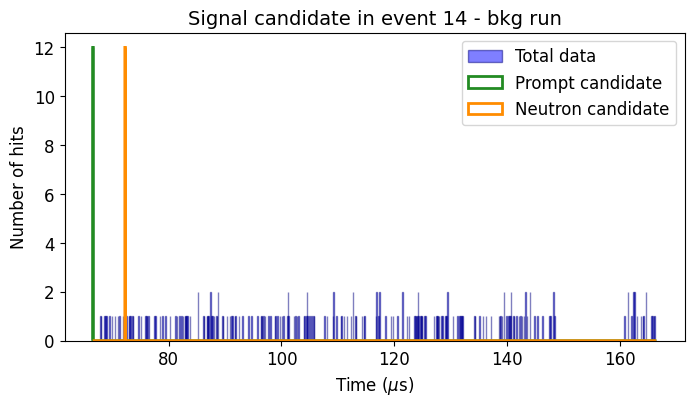

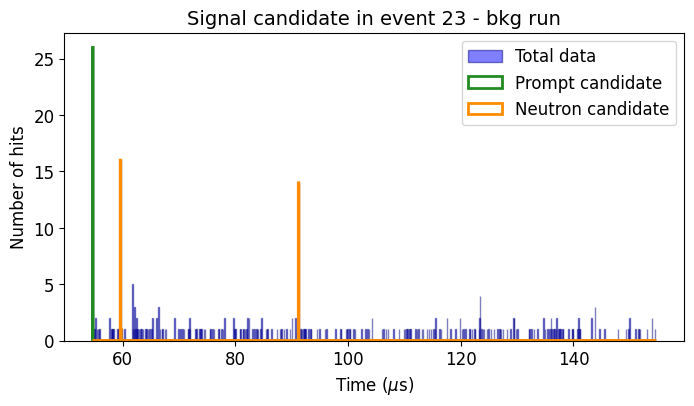

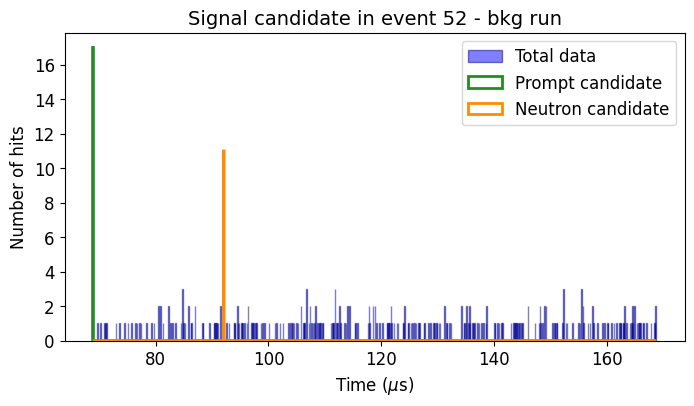

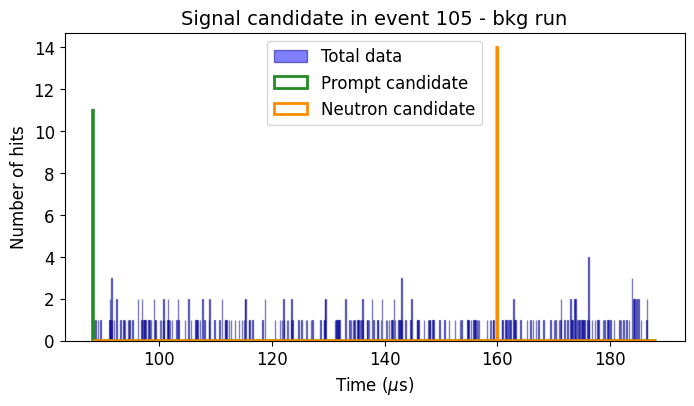

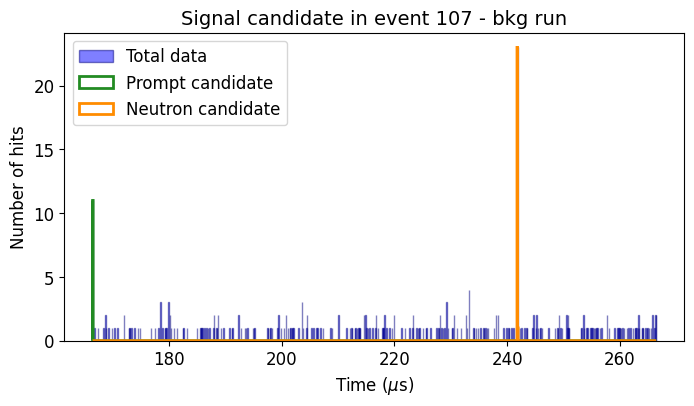

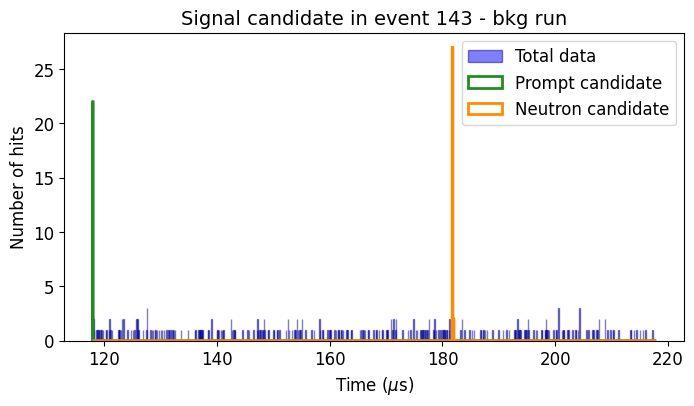

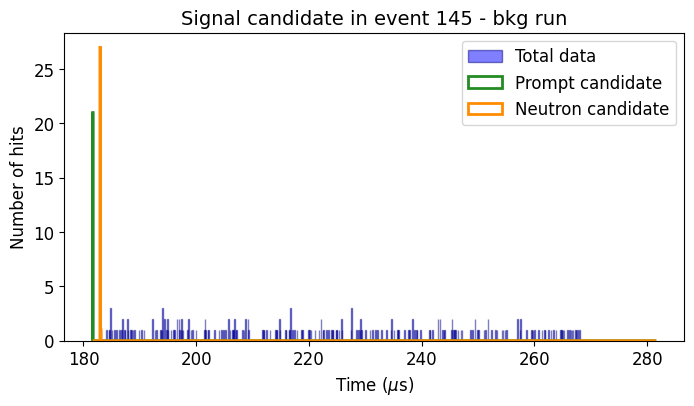

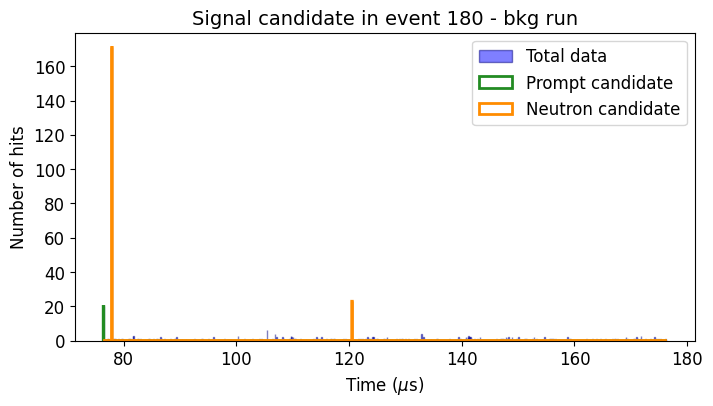

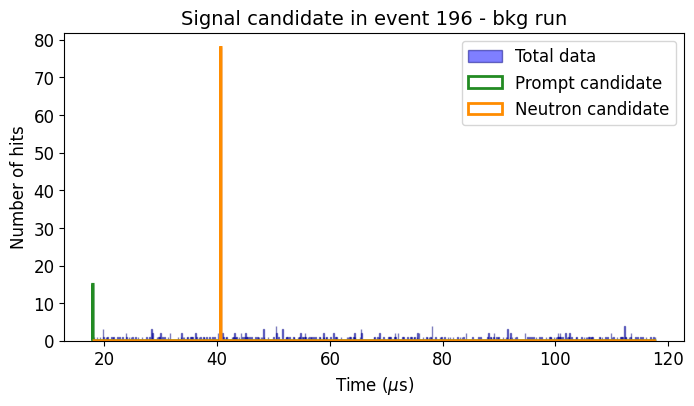

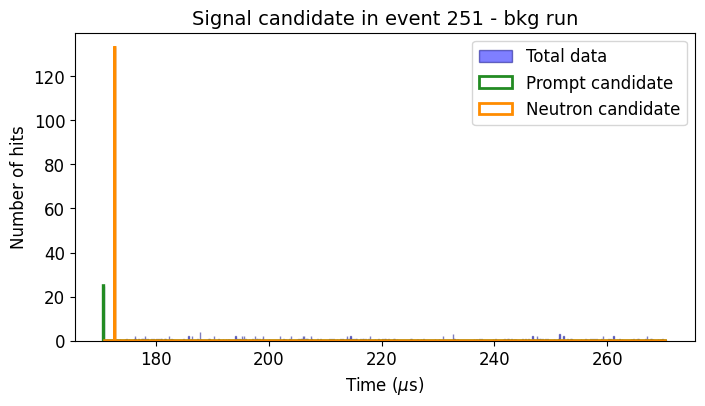

In [25]:
neutron_dict_cut = dict(list(neutron_dict.items())[0:10])

print(neutron_dict)

for event_number in neutron_dict_cut:
    for start_time in neutron_dict_cut[event_number]:

        neutron_times = neutron_dict_cut[event_number][start_time]

        bin_edges = np.arange(start_time, start_time + 100001, 100) 

        plt.figure(figsize=(8, 4))
        plt.hist(
            times_branch_modified_chargesTT[event_number],
            bins=bin_edges,
            color='blue',
            edgecolor='navy',
            alpha=0.5,
            label="Total data"
        )
        mask = (times_branch_sup5[event_number] >= start_time) & (times_branch_sup5[event_number] < start_time + 100)
        plt.hist(
            times_branch_sup5[event_number][mask],
            bins=bin_edges,
            histtype='step',
            color='forestgreen',
            linewidth=2,
            label="Prompt candidate"
        )
        for t in neutron_times:
            mask = (times_branch_modified_chargesTT[event_number] >= t-20) & (times_branch_modified_chargesTT[event_number] <= t + 200)
            plt.hist(
                times_branch_modified_chargesTT[event_number][mask],
                bins=bin_edges,
                histtype='step',
                color='darkorange',
                linewidth=2,
                label='Neutron candidate' if t == neutron_times[0] else None
            )
        plt.xlabel(r'Time ($\mu$s)', fontsize=12)
        plt.ylabel('Number of hits', fontsize=12)
        plt.title(f'Signal candidate in event {event_number} - bkg run', fontsize=14)
        plt.xticks(fontsize=12) 
        plt.yticks(fontsize=12)
        plt.legend(fontsize=12)
        plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{x/1000:.0f}'))
        plt.show()

In [26]:
print(sum(len(v) for v in neutron_dict.values()))
print(sum(len(v) for v in threshold_times_50.values()))

print(sum(len(v) for v in neutron_dict_sig.values()))
print(sum(len(v) for v in threshold_times_50_sig.values()))

80
566
142
770


In [27]:
print(neutron_dict)
deltaT = []
for event_number in neutron_dict:
    for start_time in neutron_dict[event_number]:
        neutron_times = neutron_dict[event_number][start_time]
        deltaT.append(min(neutron_times) - start_time)

print(deltaT)
print(np.mean(deltaT))


print(neutron_dict_sig)
deltaT_sig = []
for event_number in neutron_dict_sig:
    for start_time in neutron_dict_sig[event_number]:
        neutron_times = neutron_dict_sig[event_number][start_time]
        deltaT_sig.append(min(neutron_times) - start_time)

print(deltaT_sig)
print(np.mean(deltaT_sig))


{14: {66510.37811512145: [72238.88700649944]}, 23: {54681.32159514619: [59643.4601574205, 91194.15013080109]}, 52: {68814.39676057157: [92020.60827400422]}, 105: {88196.09461970323: [159935.33843535016]}, 107: {166445.55894814405: [241759.33437676504]}, 143: {117925.01467964846: [181770.50466303824]}, 145: {181616.9678006991: [182941.70412713388]}, 180: {76387.21233355175: [77947.50401940894, 120554.93775702703]}, 196: {17887.313646325645: [40630.1330356839]}, 251: {170599.04519757518: [172637.35494033466]}, 268: {240448.64164381457: [252141.42491103467]}, 275: {125135.58027158334: [136241.26772329633]}, 290: {177087.90347605888: [268940.69513066404]}, 326: {133872.65666079533: [174694.5523658011]}, 330: {35565.51694194287: [67557.22789945063]}, 358: {51954.97116583655: [65708.45333456762]}, 392: {146388.81881257673: [175604.10946513803, 189941.5405203324, 197431.7137147154]}, 401: {140172.90629432938: [161474.16564674737]}, 403: {102811.00037950964: [200326.01984541147]}, 414: {202657

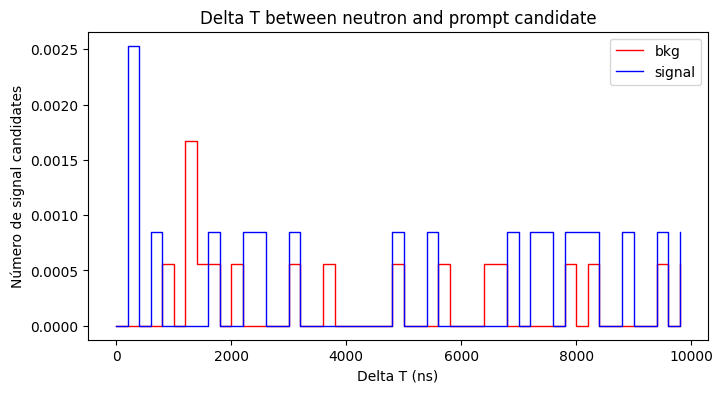

In [28]:
hist, bins_edges = np.histogram(deltaT, bins=50, range=(0, 10000))
hist_sig, _ = np.histogram(deltaT_sig, bins=bins_edges, range=(0, 10000))

plt.figure(figsize=(8, 4))

plt.step(bins_edges[:-1], hist/N_events, where='post', linewidth=1, label='bkg', color='red')
plt.step(bins_edges[:-1], hist_sig/N_events_sig, where='post', linewidth=1, label='signal', color='blue')
plt.xlabel('Delta T (ns)')
plt.ylabel('Número de signal candidates')
plt.title('Delta T between neutron and prompt candidate')
plt.legend()
plt.show()

In [29]:
nDetections_event_inf5 = []
nDetections_event_sup5 = []


for x in times_branch_modified_50:
    nDetections_event_inf5.append(len(x))

for x in times_branch_sup5:
    nDetections_event_sup5.append(len(x))

nDetections_event_inf5_sig = []
nDetections_event_sup5_sig = []


for x in times_branch_modified_50_sig:
    nDetections_event_inf5_sig.append(len(x))

for x in times_branch_sup5_sig:
    nDetections_event_sup5_sig.append(len(x))

NameError: name 'times_branch_modified_50' is not defined

In [ ]:
max_hist = 6500
bin_hist =  100#max_hist / n_bins  
n_bins = int(max_hist / bin_hist)


hist_inf_5, _ = np.histogram(nDetections_event_inf5, bins = bin_edges)
hist_inf_5_sig, _ = np.histogram(nDetections_event_inf5_sig, bins = bin_edges)

hist_sup_5, bin_edges_2 = np.histogram(nDetections_event_sup5, bins = n_bins)
hist_sup_5_sig, _ = np.histogram(nDetections_event_sup5_sig, bins = bin_edges_2)


plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges[:-1], hist_inf_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges[:-1], hist_inf_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits <50')
plt.show()

plt.figure(figsize=(10, 6), facecolor='white')
plt.step(bin_edges_2[:-1], hist_sup_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges_2[:-1], hist_sup_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.legend()
plt.xlabel('Number of Hits')
plt.ylabel('Number of Events')
plt.title('window 50 ns nhits >50')
#plt.yscale("log")
plt.show()


In [ ]:
bin_window = 4000

nHits_inf5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_modified_50, bin_window)
nHits_sup5 = functions_spills.counting_nHits_window(event_number_branch, times_branch_sup5, bin_window)

nHits_inf5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_modified_50_sig, bin_window)
nHits_sup5_sig = functions_spills.counting_nHits_window(event_number_branch_sig, times_branch_sup5_sig, bin_window)


In [ ]:
n_bins = 100

hist_inf_5, bin_inf5 = np.histogram(nHits_inf5, np.arange(0, 11, 1))
hist_inf_5_sig, _ = np.histogram(nHits_inf5_sig, bins = bin_inf5)

hist_sup_5, bin_edges_2 = np.histogram(nHits_sup5, np.arange(0, 50, 2))
hist_sup_5_sig, _ = np.histogram(nHits_sup5_sig, bins = bin_edges_2)


In [ ]:

plt.figure(figsize=(10, 6))
plt.step(bin_inf5[:-1], hist_inf_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_inf5[:-1], hist_inf_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits <5")
#plt.yscale('log')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.step(bin_edges_2[:-1], hist_sup_5 / N_events, where='post', label='bkg', color='red')
plt.step(bin_edges_2[:-1], hist_sup_5_sig / N_events_sig, where='post', label='signal', color='blue')
plt.ylabel("Number of windows")
plt.xlabel(f"hits in {bin_window} ns")
plt.title("window 50 ns nhits >5")
#plt.yscale('log')
plt.legend()
plt.show()